In [1]:
# Set Kaggle API - Username / Key
import os
os.environ['KAGGLE_USERNAME'] = "franconicolsmerenda"
os.environ['KAGGLE_KEY'] = "edcd91fb1521ad3ee181a8b093795eab"
os.environ['DATASET_FOLDER'] = "/home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets"
os.environ['ART_STYLE'] = "all_styles"

# DATASET Folders
os.environ['TRAIN_DATASET_ART_STYLE'] = f"{os.environ['DATASET_FOLDER']}/Real_AI_SD_LD_Dataset/train"
os.environ['TEST_DATASET_ART_STYLE'] = f"{os.environ['DATASET_FOLDER']}/Real_AI_SD_LD_Dataset/test"

# Data to be consumed by the model!
os.environ['TOP_DIR']=f"{os.environ['DATASET_FOLDER']}/Real_AI_SD_LD_Dataset"
os.environ['TRAIN_ART_STYLE_DATA'] = f"{os.environ['DATASET_FOLDER']}/Real_AI_SD_LD_Dataset/train"
os.environ['VALID_ART_STYLE_DATA'] = f"{os.environ['DATASET_FOLDER']}/Real_AI_SD_LD_Dataset/test"

In [2]:
# Download Datasets if Needed
import os

# Define the folder path
folder_path = f"{os.environ['DATASET_FOLDER']}"

# Check if the folder exists
if not os.path.exists(f"{folder_path}/Real_AI_SD_LD_Dataset"):
    # Install kaggle package
    !pip install -q kaggle
    # Download the dataset from Kaggle
    !kaggle datasets download -d ravidussilva/real-ai-art -p $folder_path --unzip
else:
    print("Folder already exists.")

Folder already exists.


In [3]:
#Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd

2024-07-19 11:42:50.896398: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-19 11:42:51.369569: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# Define paths to training and validation data
train_data_dir = os.environ['TRAIN_ART_STYLE_DATA']
valid_data_dir = os.environ['VALID_ART_STYLE_DATA']

# Define constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64
NUM_EPOCHS = 30

In [5]:
#Main directory where datasets are stored
top_dir = os.environ['TOP_DIR']

# Define the training paths
train_dir = os.path.join(top_dir, 'train')

# List all directories in the train directory
all_directories = os.listdir(train_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
train_human = []
train_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        train_human.append(os.path.join(train_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        train_ai.append(os.path.join(train_dir, directory))

# Print the lists of directories
print("Train directories containing human-drawn images:")
for i, directory in enumerate(train_human):
    print(f"{i}. {directory}")

print("\nTrain directories containing AI-generated images:")
for i, directory in enumerate(train_ai):
    print(f"{i}. {directory}")

Train directories containing human-drawn images:
0. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/baroque
1. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/romanticism
2. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/renaissance
3. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/expressionism
4. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/post_impressionism
5. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/ukiyo_e
6. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/art_nouveau
7. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/realism
8. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/train/impressionism
9. /hom

In [6]:
# Define the test paths
test_dir = os.path.join(top_dir, 'test')

# List all directories in the test directory
all_directories = os.listdir(test_dir)

# Initialize lists to store directories for human-drawn and AI-generated images
test_human = []
test_ai = []

# Loop through all directories
for directory in all_directories:
    # Check if the directory represents human-drawn images
    if not directory.startswith('AI_'):
        test_human.append(os.path.join(test_dir, directory))
    # Check if the directory represents AI-generated images
    else:
        test_ai.append(os.path.join(test_dir, directory))

# Print the lists of directories
print("Test directories containing human-drawn images:")
for i, directory in enumerate(test_human):
    print(f"{i}. {directory}")

print("\nTest directories containing AI-generated images:")
for i, directory in enumerate(test_ai):
    print(f"{i}. {directory}")

Test directories containing human-drawn images:
0. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/baroque
1. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/romanticism
2. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/renaissance
3. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/expressionism
4. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/post_impressionism
5. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/ukiyo_e
6. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/art_nouveau
7. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/realism
8. /home/millenium-falcon/SoftwareProjects/ai-art-casa/.datasets/Real_AI_SD_LD_Dataset/test/impressionism
9. /home/milleniu

In [7]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for train_data with the columns filepath and label
train_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under train_human as "human"
for directory in train_human:
    for file in os.listdir(directory):
        #creating value to store in filepath column
        filepath = os.path.join(directory, file)
        #append value into the column filepath
        filepaths.append(filepath)
        #adding classification 'human' to value
        labels.append("human")

# Label files under train_ai as "AI"
for directory in train_ai:
    for file in os.listdir(directory):
        #creating value to store in filepath column
        filepath = os.path.join(directory, file)
        #append value into the column filepath
        filepaths.append(filepath)
        #adding classification 'AI' to value
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with train_data
train_data = pd.concat([train_data, data], ignore_index=True)

In [8]:
# Display the first few,cou rows of the train_data DataFrame
print(train_data.head())

                                            filepath  label
0  /home/millenium-falcon/SoftwareProjects/ai-art...  human
1  /home/millenium-falcon/SoftwareProjects/ai-art...  human
2  /home/millenium-falcon/SoftwareProjects/ai-art...  human
3  /home/millenium-falcon/SoftwareProjects/ai-art...  human
4  /home/millenium-falcon/SoftwareProjects/ai-art...  human


In [9]:
# Count the number of files under each label
file_counts = train_data['label'].value_counts()

# Print the counts
print("Number of files under each label:")
print(file_counts)

Number of files under each label:
label
AI       105015
human     50000
Name: count, dtype: int64


In [10]:
# Display the first few rows of the train_data DataFrame
print(train_data.head())

# Count the number of files under each label
file_counts = train_data['label'].value_counts()

# Print the counts
print("\nNumber of files under each label:")
print(file_counts)

                                            filepath  label
0  /home/millenium-falcon/SoftwareProjects/ai-art...  human
1  /home/millenium-falcon/SoftwareProjects/ai-art...  human
2  /home/millenium-falcon/SoftwareProjects/ai-art...  human
3  /home/millenium-falcon/SoftwareProjects/ai-art...  human
4  /home/millenium-falcon/SoftwareProjects/ai-art...  human

Number of files under each label:
label
AI       105015
human     50000
Name: count, dtype: int64


In [11]:
# Initialize lists to store file paths and labels
filepaths = []
labels = []

# Initialize an empty DataFrame for test_data
test_data = pd.DataFrame(columns=['filepath', 'label'])

# Label files under test_human as "human"
for directory in test_human:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("human")

# Label files under test_ai as "AI"
for directory in test_ai:
    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        filepaths.append(filepath)
        labels.append("AI")

# Create a DataFrame with file paths and labels
data = pd.DataFrame({'filepath': filepaths, 'label': labels})

# Concatenate data with test_data
test_data = pd.concat([test_data, data], ignore_index=True)

In [12]:
# Display the first few rows of the test_data DataFrame
print(test_data.head())

# Count the number of files under each label
file_counts = test_data['label'].value_counts()

# Print the counts
print("\nNumber of files under each label:")
print(file_counts)

                                            filepath  label
0  /home/millenium-falcon/SoftwareProjects/ai-art...  human
1  /home/millenium-falcon/SoftwareProjects/ai-art...  human
2  /home/millenium-falcon/SoftwareProjects/ai-art...  human
3  /home/millenium-falcon/SoftwareProjects/ai-art...  human
4  /home/millenium-falcon/SoftwareProjects/ai-art...  human

Number of files under each label:
label
AI       20000
human    10000
Name: count, dtype: int64


In [13]:
#Created training set with data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_generator = ImageDataGenerator(rescale=1./255,   # to normalize pixel value
                                        rotation_range=7, # it will apply rotations to the image
                                        horizontal_flip=True, # it will flip image horizontally
                                       # zoom_range=0.2  # it will increase and decrease zoom by 0.2x
                                       )
train_dataset = training_generator.flow_from_dataframe(
    dataframe=train_data,
    x_col='filepath',  # Column containing file paths
    y_col='label',     # Column containing labels
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=64,
    class_mode='binary',  
    shuffle=True
)

Found 155015 validated image filenames belonging to 2 classes.


In [14]:
train_dataset.class_indices

{'AI': 0, 'human': 1}

In [15]:
#Created validation set
val_generator = ImageDataGenerator(rescale=1./255,rotation_range=7, # it will apply rotations to the image
                                        horizontal_flip=True)
val_dataset = val_generator.flow_from_dataframe(  dataframe=test_data,
                                                    x_col='filepath',  # Column containing file paths
                                                    y_col='label',     # Column containing labels
                                                    target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size = 1,    # 1 image at a time to evaluate the NN
                                                    class_mode = 'binary',
                                                    shuffle = False)   # to associate the prediction with expected output

val_dataset.class_indices

Found 30000 validated image filenames belonging to 2 classes.


{'AI': 0, 'human': 1}

In [21]:
#from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

#Created network using ResNet50 and transfer learning from 'ImageNet'
network= ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in network.layers:
    layer.trainable=False

network.summary()

# Added layers to the base model created by ResNet34
model = Sequential([
    network,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # For binary classification
])


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [22]:
# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [26]:
print(es)

In [27]:

#TRAINING MODEL
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=val_dataset, callbacks=[es])

Epoch 1/30


2024-07-19 11:46:09.333409: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


   2/2423 ━━━━━━━━━━━━━━━━━━━━ 2:28 61ms/step - accuracy: 0.5742 - loss: 7.9327  

I0000 00:00:1721400372.589806  561706 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1114s 456ms/step - accuracy: 0.6704 - loss: 0.7481 - val_accuracy: 0.6673 - val_loss: 0.4888
Epoch 2/30
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1077s 443ms/step - accuracy: 0.6765 - loss: 0.5379 - val_accuracy: 0.6674 - val_loss: 0.4587
Epoch 3/30
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1078s 444ms/step - accuracy: 0.7150 - loss: 0.5008 - val_accuracy: 0.8042 - val_loss: 0.4360
Epoch 4/30
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1078s 444ms/step - accuracy: 0.7356 - loss: 0.4879 - val_accuracy: 0.8214 - val_loss: 0.4253
Epoch 5/30
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1077s 443ms/step - accuracy: 0.7481 - loss: 0.4764 - val_accuracy: 0.8132 - val_loss: 0.4141
Epoch 6/30
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1075s 443ms/step - accuracy: 0.7556 - loss: 0.4704 - val_accuracy: 0.8222 - val_loss: 0.4050
Epoch 7/30
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1077s 444ms/step - accuracy: 0.7727 - loss: 0.4539 - val_accuracy: 0.8254 - val_loss: 0.3994
Epoch 8/30
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 1079s 444ms/step - accur

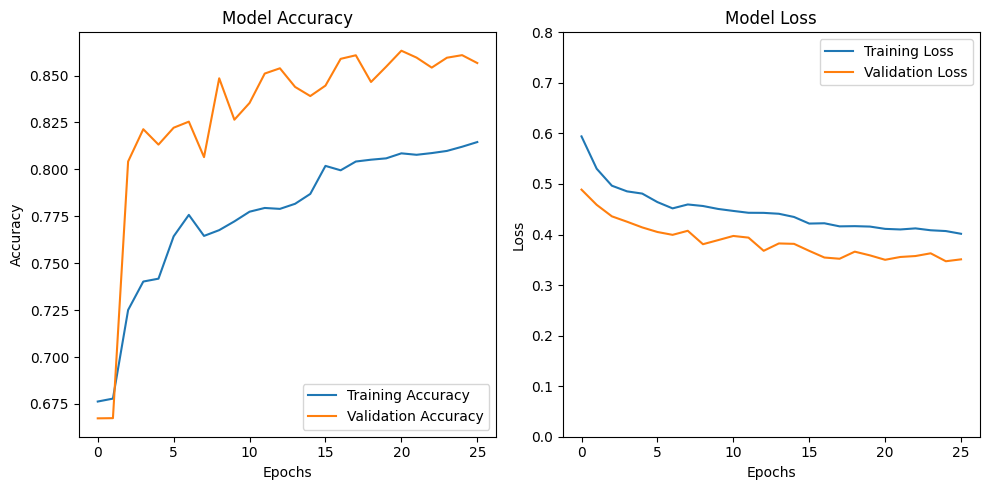

In [28]:
# Accuracy vs Loss

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 0.8)  # Adjust the upper limit of the y-axis
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
test_loss, test_acc = model.evaluate(val_dataset)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

30000/30000 ━━━━━━━━━━━━━━━━━━━━ 217s 7ms/step - accuracy: 0.8053 - loss: 0.5444
Test accuracy: 0.8615333437919617
Test loss: 0.35117611289024353


In [30]:
import numpy as np

# Get the true labels
true_labels = val_dataset.classes

# Make predictions
predictions = model.predict(val_dataset)
predicted_labels = np.round(predictions).flatten()  # For binary classification


30000/30000 ━━━━━━━━━━━━━━━━━━━━ 181s 6ms/step


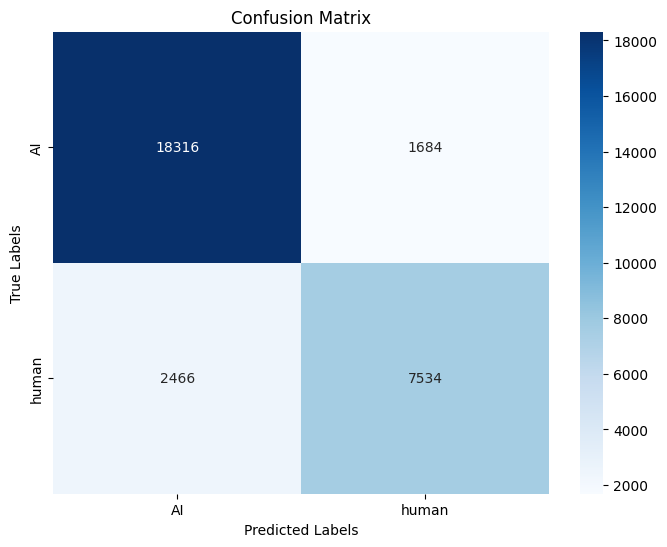

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['AI', 'human'], yticklabels=['AI', 'human'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
